# **Data Cleaning & Preprocessing Analyst**

In [69]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Load the Dataset.
df = pd.read_csv('/content/customer_churn_dataset (1).csv')

df

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Charges,Total_Charges,Payment_Method,Tenure,Contract_Type,Support_Calls_Last_Year,Streaming_Services_Used,Customer_Satisfaction_Score,Churn
0,100000,56,Male,34,115.79,3936.86,Bank Transfer,53,Two-Year,16,5,3,No
1,100001,69,Female,27,177.76,4799.52,Debit Card,1,Month-to-Month,0,0,3,Yes
2,100002,46,Male,7,68.40,478.80,Debit Card,12,One-Year,6,0,4,No
3,100003,32,Female,3,141.48,424.44,Credit Card,24,One-Year,17,2,10,No
4,100004,60,Male,47,153.06,7193.82,PayPal,1,One-Year,3,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,25,Female,38,51.74,1966.12,Debit Card,34,One-Year,9,4,5,No
9996,109996,38,Male,27,183.86,4964.22,Credit Card,13,Two-Year,10,1,5,No
9997,109997,73,Male,54,91.07,4917.78,Credit Card,33,One-Year,15,3,2,Yes
9998,109998,23,Male,39,134.20,5233.80,Credit Card,22,One-Year,7,2,1,Yes


**Handle missing values, outliers, and inconsistencies -**

In [71]:
# Check for missing values.
missing_values = df.isnull().sum()

print(missing_values)

CustomerID                     0
Age                            0
Gender                         0
Subscription_Length_Months     0
Monthly_Charges                0
Total_Charges                  0
Payment_Method                 0
Tenure                         0
Contract_Type                  0
Support_Calls_Last_Year        0
Streaming_Services_Used        0
Customer_Satisfaction_Score    0
Churn                          0
dtype: int64


In [72]:
# Fill missing values with the mean (for numerical columns only)
numeric_cols = df.select_dtypes(include=np.number).columns  # Select numeric columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean()) # Fill NaNs in numeric cols with their means

In [73]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns

df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0]) # Fill NaNs in categorical cols with their mode

In [74]:
# Now proceed with dropping rows if any NaNs remain in non-numeric columns
df.dropna(inplace=True)

In [75]:
# Detect outliers using IQR for numerical features only
numeric_df = df.select_dtypes(include=np.number) # Select only numeric features for IQR

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

CustomerID                       0
Age                              0
Subscription_Length_Months       0
Monthly_Charges                  0
Total_Charges                  104
Tenure                           0
Support_Calls_Last_Year          0
Streaming_Services_Used          0
Customer_Satisfaction_Score      0
dtype: int64


In [76]:
# Or remove outliers.
numeric_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [77]:
numeric_df.head()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Charges,Total_Charges,Payment_Method,Tenure,Contract_Type,Support_Calls_Last_Year,Streaming_Services_Used,Customer_Satisfaction_Score,Churn
0,100000,56,Male,34,115.79,3936.86,Bank Transfer,53,Two-Year,16,5,3,No
1,100001,69,Female,27,177.76,4799.52,Debit Card,1,Month-to-Month,0,0,3,Yes
2,100002,46,Male,7,68.40,478.80,Debit Card,12,One-Year,6,0,4,No
3,100003,32,Female,3,141.48,424.44,Credit Card,24,One-Year,17,2,10,No
4,100004,60,Male,47,153.06,7193.82,PayPal,1,One-Year,3,0,1,No


In [78]:
# Standardize categorical data (e.g., converting to lowercase)
df['Gender'] = df['Gender'].str.lower()

# Ensure numerical data is within expected ranges
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

**Perform exploratory data analysis (EDA) to identify key trends.**

In [79]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

         CustomerID           Age  Subscription_Length_Months  \
count   10000.00000  10000.000000                10000.000000   
mean   104999.50000     49.304400                   30.300700   
std      2886.89568     18.189349                   17.310114   
min    100000.00000     18.000000                    1.000000   
25%    102499.75000     34.000000                   15.000000   
50%    104999.50000     49.000000                   30.000000   
75%    107499.25000     65.000000                   46.000000   
max    109999.00000     80.000000                   60.000000   

       Monthly_Charges  Total_Charges        Tenure  Support_Calls_Last_Year  \
count     10000.000000   10000.000000  10000.000000             10000.000000   
mean        106.666788    3214.969525     30.745500                 9.944500   
std          54.665975    2632.690119     17.497615                 6.073509   
min          10.010000      10.400000      1.000000                 0.000000   
25%          6

In [80]:
# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

       Gender Payment_Method   Contract_Type  Churn
count   10000          10000           10000  10000
unique      2              4               3      2
top      male     Debit Card  Month-to-Month     No
freq     5013           2532            3359   6984


In [81]:
# Calculate the total number of customers

total_customers = len(df)
print(total_customers)

10000


In [82]:
# Calculate the number of churned customers.

churned_customers = df['Churn'].value_counts()['Yes']
print(churned_customers)

3016


In [83]:
# Calculate the churn rate.

churn_rate = (churned_customers / total_customers) * 100
print(churn_rate)

30.159999999999997


In [84]:
# Print the churn rate
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 3016.00%


**Data Distributions**

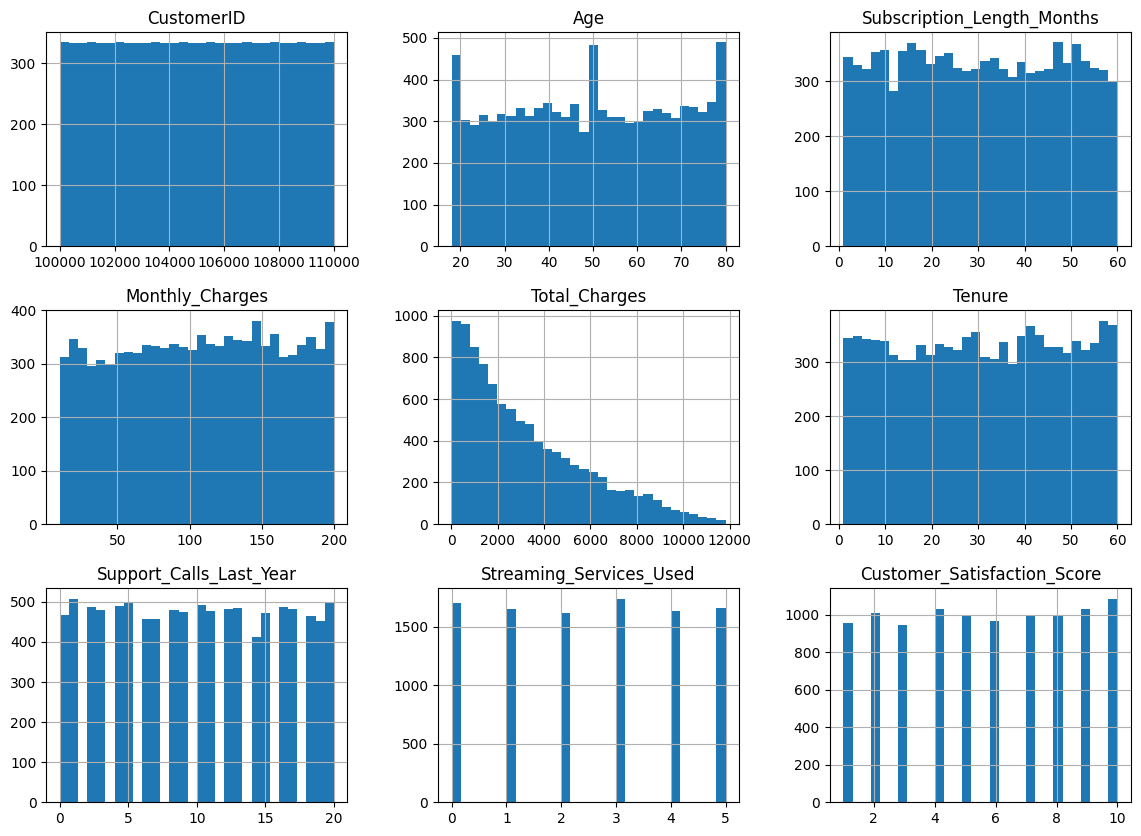

In [85]:
# Visualize the distributions of numerical columns using histograms.

df.hist(figsize= (14,10), bins= 30)
plt.show()

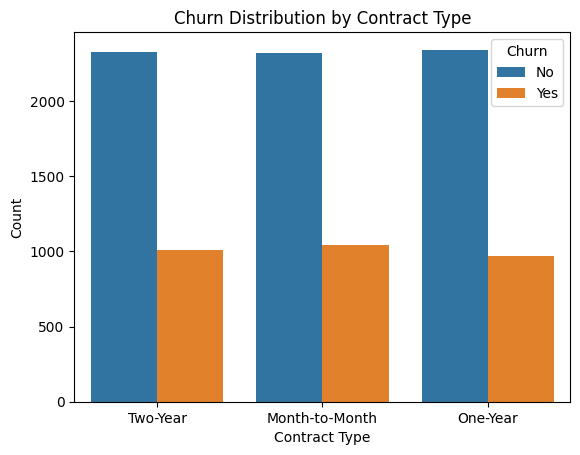

In [86]:
# visualize the churn rate based on different categorical features.

sns.countplot(x='Contract_Type', hue='Churn', data=df)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

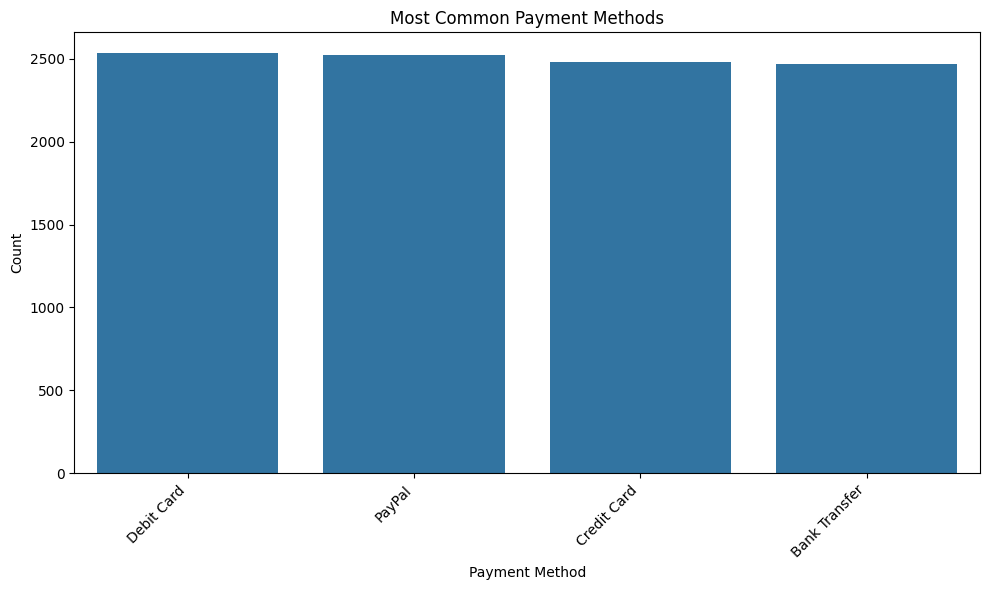

In [87]:
# Visualizing the Most Common Payment Method.

# Count the frequency of each payment method
payment_method_counts = df['Payment_Method'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

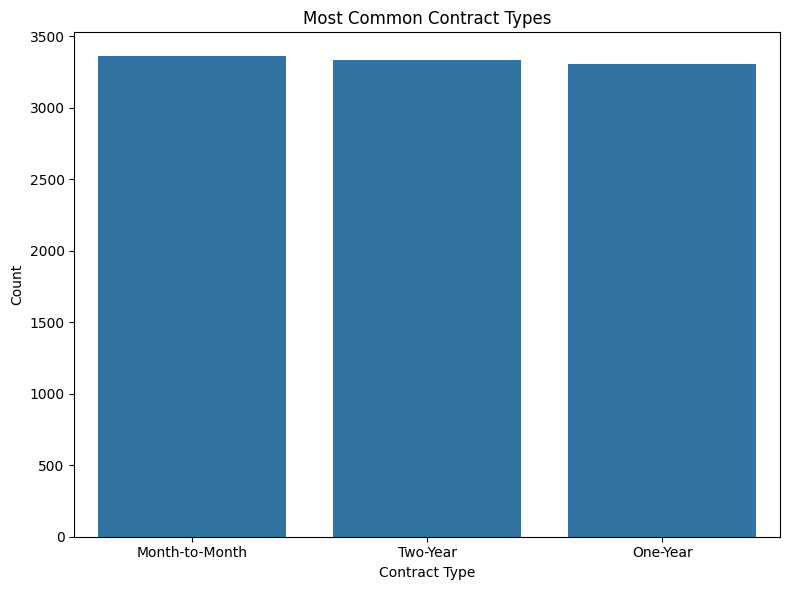

In [88]:
# Visualizing the Most Common Contract Type.

# Count the frequency of each contract type
contract_type_counts = df['Contract_Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=contract_type_counts.index, y=contract_type_counts.values)
plt.title('Most Common Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

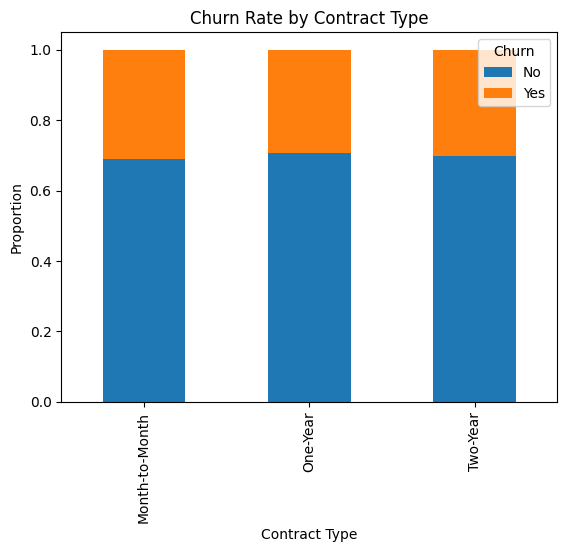

In [89]:
churn_by_contract = df.groupby('Contract_Type')['Churn'].value_counts(normalize=True).unstack()
churn_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.show()

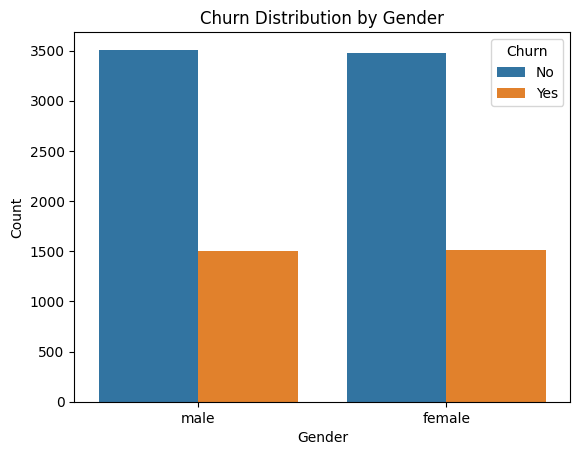

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

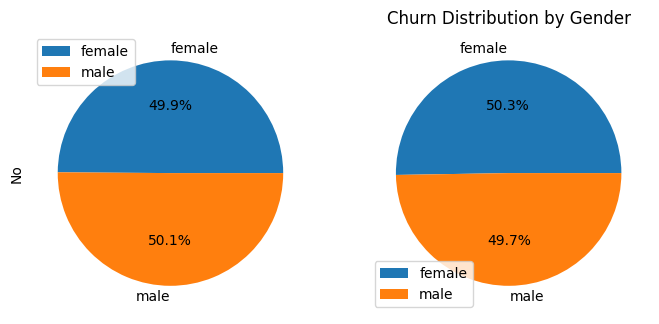

In [91]:
churn_by_gender = df.groupby('Gender')['Churn'].value_counts(normalize=True).unstack()

# Create a pie chart
churn_by_gender.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8, 8))
plt.title('Churn Distribution by Gender')
plt.ylabel('')  # Removed the default ylabel
plt.show()

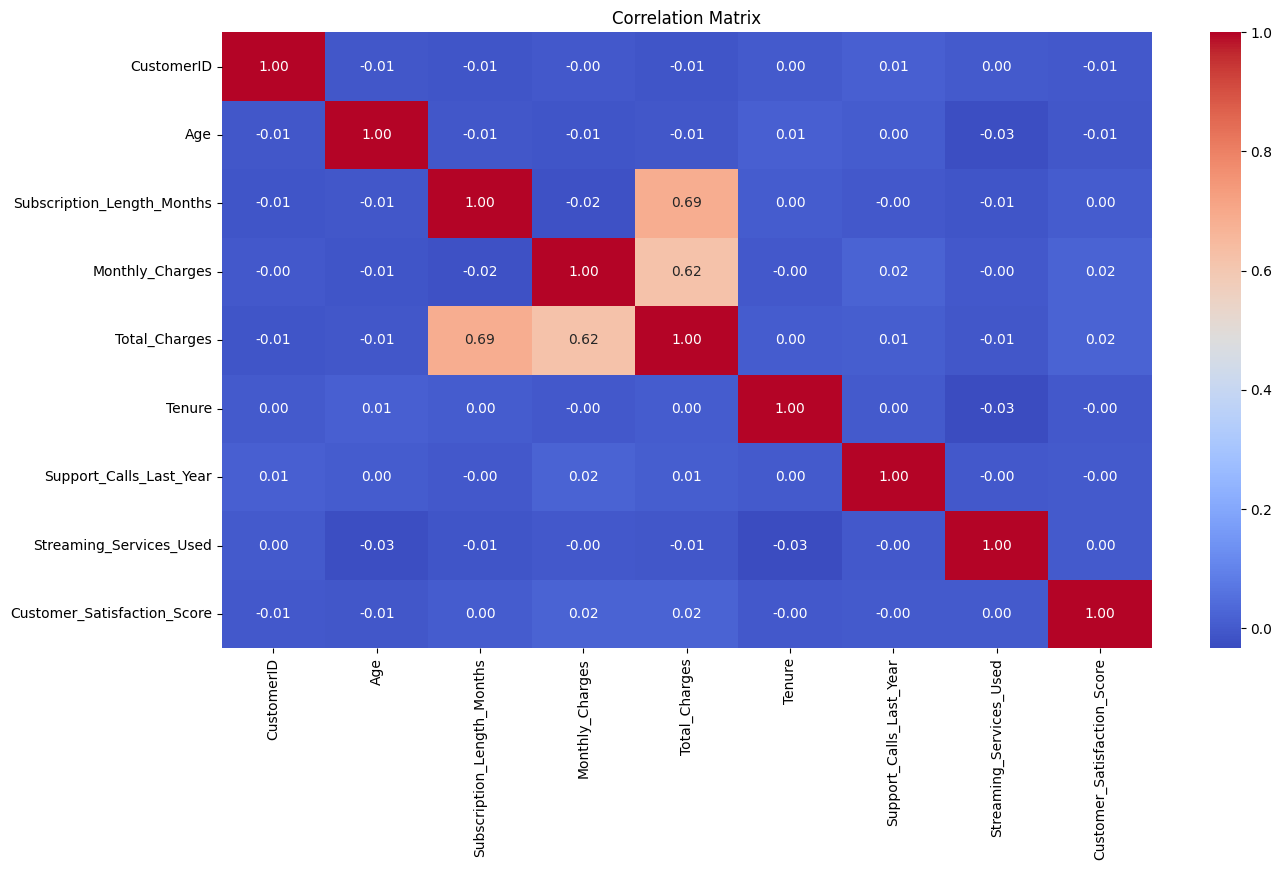

In [92]:
# Check for correlations between numerical variables.
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [93]:
# Analyze the churn rate based on different features.

churn_by_gender = df.groupby('Gender')['Churn'].value_counts(normalize=True).unstack()

print(churn_by_gender)

Churn         No       Yes
Gender                    
female  0.696812  0.303188
male    0.699980  0.300020


In [94]:
# Churn rate by contract type
churn_by_contract = df.groupby('Contract_Type')['Churn'].value_counts(normalize=True).unstack()

print(churn_by_contract)

Churn                 No       Yes
Contract_Type                     
Month-to-Month  0.690384  0.309616
One-Year        0.707162  0.292838
Two-Year        0.697779  0.302221


**Visualizations**

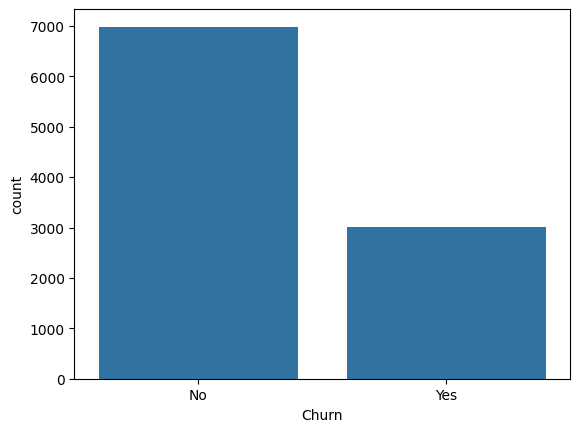

In [95]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.show()

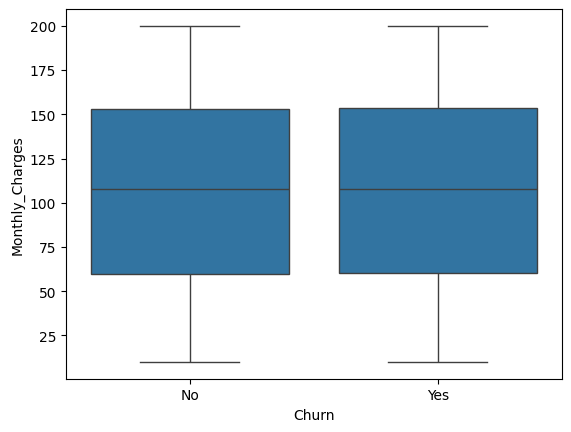

In [96]:
# Monthly charges vs. churn
sns.boxplot(x='Churn', y='Monthly_Charges', data=df)
plt.show()

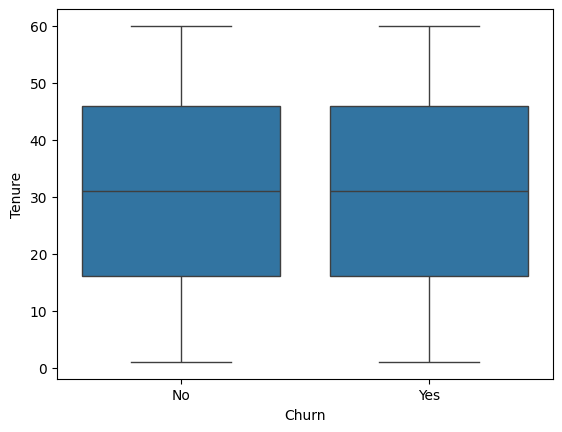

In [97]:
# Tenure vs. churn
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.show()

In [98]:
df.to_csv('cleaned_data.csv', index=False)

# files.download('cleaned_data.csv')

**Summary**

**Missing Values:** Handled by filling or dropping.

**Outliers:** Detected and handled using IQR.

**Inconsistencies:** Standardized categorical data and ensured numerical data is within expected ranges.

**EDA:** Performed summary statistics, visualized data distributions, and analyzed churn rates.

**Visualizations:** Created plots to understand the relationship between features and churn.

# **Modeling & Insights Analyst**

**Data Preprocessing**

In [99]:
# import necessary libraries for model building.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/content/cleaned_data.csv')

In [100]:
# Convert 'Churn' to binary (1 for 'Yes', 0 for 'No').

df['Churn'] = df['Churn'].map({'Yes' : 1, 'No': 0})

In [101]:
X = df.drop('Churn', axis = 1) # Features
y = df['Churn']  # Target variables.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [103]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [104]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

**Feature Engineering**

In [105]:
df['Total_Charges_Per_Month'] = df['Total_Charges'] / df['Subscription_Length_Months']  #Create a new feature 'Total_Charges_Per_Month'

df['Support_Calls_Last_Year'] = df['Support_Calls_Last_Year'].fillna(0)

df['Support_Calls_Per_Month'] = df['Support_Calls_Last_Year'] / 12    # Create a new feature 'Support_Calls_Per_Month'

In [106]:
# Update features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing again
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

**Feature Selection**

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features based on ANOVA F-statistic
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = preprocessor.get_feature_names_out()[selector.get_support()]
print(selected_features)

['num__Age' 'num__Monthly_Charges' 'num__Tenure'
 'num__Streaming_Services_Used' 'cat__Gender_male'
 'cat__Payment_Method_Bank Transfer' 'cat__Payment_Method_Credit Card'
 'cat__Payment_Method_PayPal' 'cat__Contract_Type_Month-to-Month'
 'cat__Contract_Type_One-Year']


**Model Selection**

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression.
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred_log_reg = log_reg.predict(X_test_selected)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.712
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1424
           1       0.00      0.00      0.00       576

    accuracy                           0.71      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.51      0.71      0.59      2000



In [109]:
print(confusion_matrix(y_test, y_pred_log_reg))

[[1424    0]
 [ 576    0]]


In [110]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)
y_pred_dt = dt.predict(X_test_selected)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.561
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1424
           1       0.25      0.27      0.26       576

    accuracy                           0.56      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.57      0.56      0.57      2000



In [111]:
print(confusion_matrix(y_test, y_pred_dt))

[[965 459]
 [419 157]]


In [112]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6845
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1424
           1       0.25      0.05      0.08       576

    accuracy                           0.68      2000
   macro avg       0.48      0.50      0.45      2000
weighted avg       0.58      0.68      0.60      2000



In [113]:
print(confusion_matrix(y_test, y_pred_rf))

[[1341   83]
 [ 548   28]]


**Model Evaluation**

In [114]:
from sklearn.metrics import roc_auc_score

# ROC AUC Score
y_pred_prob_log_reg = log_reg.predict_proba(X_test_selected)[:, 1]
y_pred_dt = dt.predict_proba(X_test_selected)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test_selected)[:, 1]

# Calculate ROC AUC scores
log_reg_roc_auc = roc_auc_score(y_test, y_pred_prob_log_reg)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

# Print formatted ROC AUC scores
print("Logistic_Regression ROC AUC: {:.4f}".format(log_reg_roc_auc))
print("Decision Tree ROC AUC: {:.4f}".format(dt_roc_auc))
print("Random Forest ROC AUC: {:.4f}".format(rf_roc_auc))

Logistic_Regression ROC AUC: 0.4945
Decision Tree ROC AUC: 0.4751
Random Forest ROC AUC: 0.4809


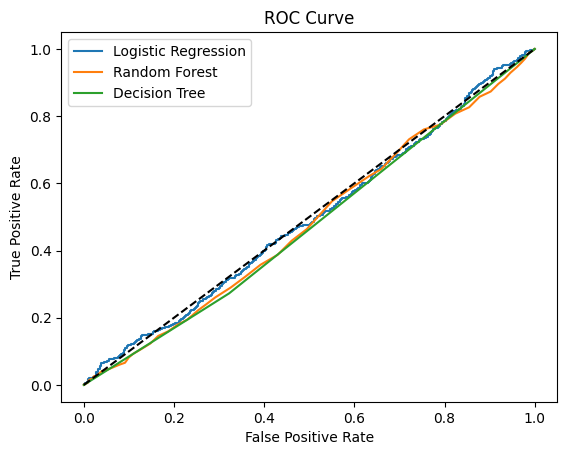

In [115]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt) # Use y_pred_dt instead of y_pred_prob_dt
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Hyperparameter Tuning**

In [116]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.6947500373406061


In [117]:
# Train the model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_selected)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Accuracy: 0.712
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1424
           1       0.00      0.00      0.00       576

    accuracy                           0.71      2000
   macro avg       0.36      0.50      0.42      2000
weighted avg       0.51      0.71      0.59      2000



**Feature Importance**

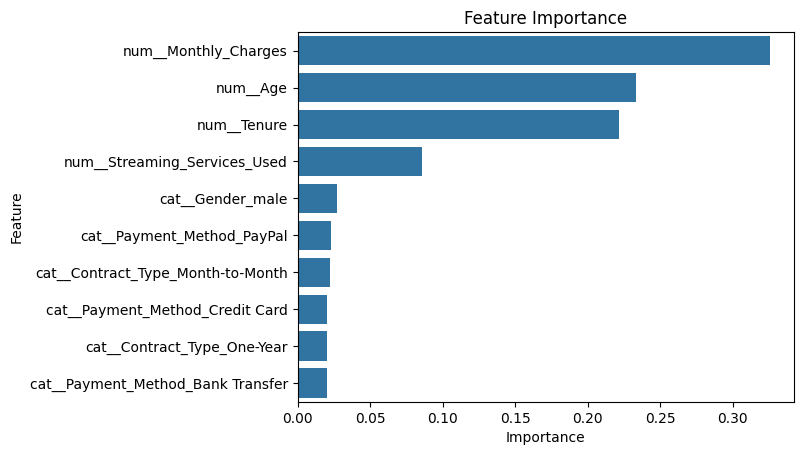

In [118]:
# Feature Importance from Random Forest
importances = best_rf.feature_importances_
feature_names = selected_features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

**Interpretation:**

**Top Features:**

Identify the top features that contribute most to predicting churn. For example, if 'Monthly_Charges' and 'Support_Calls_Per_Month' are the top features, it indicates that these factors significantly influence churn.

**Actionable Business Insights**

Based on the model results and feature importance, here are some actionable insights:

**a. Target High-Risk Customers**

Insight: Customers with higher monthly charges and more support calls per month are more likely to churn.

Action: Implement targeted retention strategies for these high-risk customers, such as personalized discounts, loyalty programs, or proactive customer support.

**b. Improve Customer Support**

Insight: The number of support calls per month is a significant predictor of churn.

Action: Enhance customer support services to reduce the number of support calls. This could include improving self-service options, providing better training for support staff, or addressing common issues proactively.

**c. Review Pricing Strategies**

Insight: Higher monthly charges are associated with higher churn rates.

Action: Review and possibly adjust pricing strategies. Consider offering tiered pricing plans or discounts for long-term commitments to make the service more attractive and reduce churn.

**d. Engage Customers with Low Tenure**

Insight: Customers with shorter tenure are more likely to churn.

Action: Develop engagement strategies for new customers, such as onboarding programs, welcome offers, or regular check-ins to build loyalty early in the customer lifecycle.

**e. Monitor Contract Types**

Insight: Certain contract types may have higher churn rates.

Action: Analyze churn rates by contract type and consider offering incentives for customers to switch to longer-term contracts, which typically have lower churn rates.

**Recommendations**

Based on the analysis, here are some strategic recommendations:

**Personalized Retention Campaigns:** Develop personalized retention campaigns targeting high-risk customers with tailored offers and incentives.

**Enhanced Customer Support:** Invest in improving customer support to reduce the number of support calls and enhance customer satisfaction.

**Pricing Adjustments:** Consider revising pricing strategies to make the service more competitive and reduce churn among price-sensitive customers.

**Customer Engagement Programs:** Implement engagement programs for new and medium-risk customers to build loyalty and reduce churn.

**Regular Monitoring:** Continuously monitor churn metrics and adjust strategies based on ongoing analysis and customer feedback.